<h1>Name: George Mohsen</h1>
<h1>ID: 43768</h1>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

<h3>Usefull Function </h3>

In [2]:
def bgr_to_rgb(image):
    im2 = image.copy()
    im2[:, :, 0] = image[:, :, 2]
    im2[:, :, 2] = image[:, :, 0]
    plt.imshow(im2)

<h3>Question 1</h3>
<h4>By using square kernel the black circle shrinks but doesn't preserve its shape</h4>
<h4>By using disk kernel the black circle shrinks preserving its round shape and the corners get a rounded shape</h4>

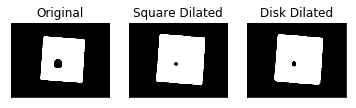

In [38]:
img = cv2.imread('image2_folder/Square-circle.png',0)
kernel_sqaure = np.ones((15,15),np.uint8)
kernel_disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
dilation_square = cv2.dilate(img, kernel_sqaure, iterations = 1)
dilation_disk = cv2.dilate(img, kernel_disk, iterations=1)
image = [img, dilation_square, dilation_disk]
titles = ['Original', 'Square Dilated', 'Disk Dilated']
for i in range(0,3):
    plt.subplot(1,3,i+1),plt.imshow(image[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

<h3>Question 2 </h3>

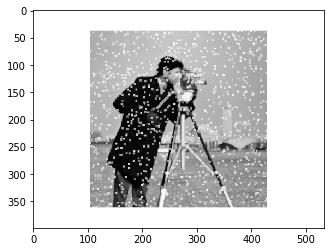

In [32]:
cameraman_image = cv2.imread('image2_folder/Cameraman.png',0)
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(cameraman_image, kernel, iterations=1)
plt.imshow(dilation, cmap='gray')
cv2.waitKey()
cv2.destroyAllWindows()

<h3>Question 3 </h3>
<h4>Boundary Extraction: Can be done by first converting the grayscale image to binary
    then we get the bounday by subtracting the dilation of the binary image from binary image.</h4>

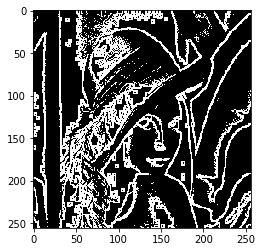

In [27]:
image = cv2.imread('image2_folder/lady.png',0)
thresh_adpat = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(thresh_adpat,kernel,iterations=1)
boundary = dilation - thresh_adpat
plt.imshow(boundary, cmap='gray')
cv2.waitKey()
cv2.destroyAllWindows()

<h3>Question 4</h3>
<h4>By using a square kernel the black hole expandes but not preserve its shape</h4>
<h4>By using a disk kernel the black hole expands preserving its round shape, and the corners
    of the image became more rounded</h4>

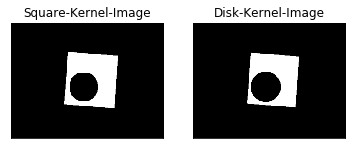

In [4]:
img = cv2.imread('image2_folder/Page-3-Image-7.png',0)
kernel = np.ones((3,3),np.uint8)
kernel_disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
erosion_square = cv2.erode(img, kernel, iterations=3)
erosion_disk = cv2.erode(img, kernel_disk, iterations=1)
image = [erosion_square, erosion_disk]
titles = ['Square-Kernel-Image','Disk-Kernel-Image']
for i in range(0,2):
    plt.subplot(1,2,i+1),plt.imshow(image[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

<h3>Question 5</h3>

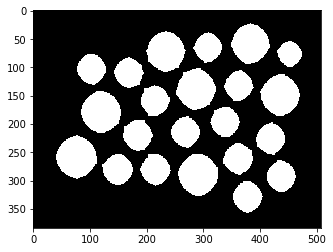

In [28]:
img = cv2.imread('image2_folder/Circle.png',0)
_,thresh = cv2.threshold(img,90,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((3,3),np.uint8)
distinctCircles = cv2.erode(thresh, kernel, iterations=5)
cv2.imshow('dc',distinctCircles)
plt.imshow(distinctCircles, cmap='gray')
cv2.waitKey()
cv2.destroyAllWindows()

<h3>Question 6</h3>
<h4>Eroding the picture removes the salt from it keeping the pepper which needed to be removed by dilation in
    order to have a clear image</h4>

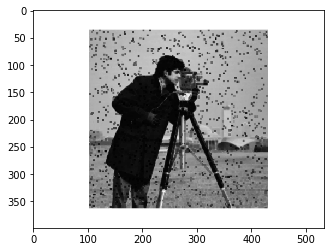

In [39]:
cameraman_image = cv2.imread('image2_folder/Cameraman.png',0)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(cameraman_image, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')
cv2.waitKey()
cv2.destroyAllWindows()

<h3>Question 7</h3>
<h4>We first here start by isolating circles from lines by using openning 
    then we subtract the output from the original to get the lines alone in an image
    and perform noise removement using erosion</h4>
<h4>Here i ised two different methods to count lines and circles
    the first one is by getting the centroids using moments function
    and put text on it</h4>
<h4>The other one by using directly the function getComponents which gives us the
    number of labels, and centroids. and by looping over this centroids for every center we write
    a certain label indicating the number of the contour</h4>

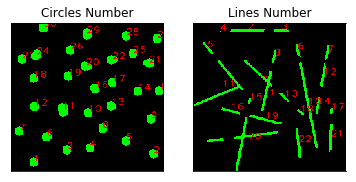

Circles: 30
Lines: 22


In [3]:
circle_lines = cv2.imread('image2_folder/Circle_and_Lines.png',0)
kernel_disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
openning = cv2.morphologyEx(circle_lines, cv2.MORPH_OPEN, kernel_disk)
lines = circle_lines - openning
kernel = np.ones((3,3),np.uint8)
lines_after_erosion = cv2.erode(lines, kernel, iterations=1)
#For calculating number of circles
contours,hierachy=cv2.findContours(openning,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
objects = np.zeros([openning.shape[0],openning.shape[1],3], 'uint8')
objects1 = np.zeros([lines_after_erosion.shape[0],lines_after_erosion.shape[1],3], 'uint8')
contours1,hierachy1=cv2.findContours(lines_after_erosion,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
i=1
for c in contours:
    cv2.drawContours(objects, [c], -1, (0,255,0),-1)
    M = cv2.moments(c)
    cx = int (M['m10']/M['m00'])
    cy = int (M['m01']/M['m00'])
    font = cv2.FONT_HERSHEY_PLAIN
    cv2.putText(objects,str(i),(cx,cy), font, 1, (0,0,255), 1, cv2.LINE_AA)
    i=i+1

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(lines_after_erosion)

j=1
for cc in contours1:
    cv2.drawContours(objects1, [cc], -1, (0,255,0),-1)
    font = cv2.FONT_HERSHEY_PLAIN
    for k in range(j-1,j):
        cv2.putText(objects1,str(j),(int(centroids[k][0]),int(centroids[k][1])),font,1,(0,0,255) ,1, cv2.LINE_AA)
    j=j+1

image = [objects,objects1]
titles = ['Circles Number','Lines Number']
for i in range(0,2):
    plt.subplot(1,2,i+1),bgr_to_rgb(image[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
print("Circles: " + str(len(contours)))
print("Lines: " + str(len(contours1)))
cv2.waitKey()
cv2.destroyAllWindows()

<h3>Background Replacement</h3>

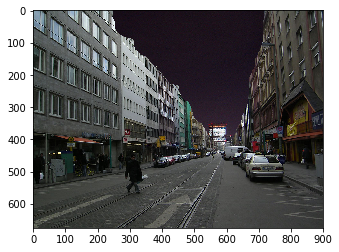

In [8]:
im2 = cv2.imread('image2_folder/morning.jpg',1)

im3 = cv2.imread('image2_folder/evening.jpg',1)

r = 900.0 / im2.shape[1]
dim = (900, int(im2.shape[0] * r))
resized = cv2.resize(im3, dim, interpolation = cv2.INTER_AREA)

im = cv2.imread('image2_folder/morning.jpg',0)
_,thresh = cv2.threshold(im,220,255,cv2.THRESH_BINARY)

# Removing noise with some dilatins and erosions
kernel = np.ones((5,5),'uint8')
dilation = cv2.dilate(thresh, kernel, iterations=2)
kernel_rectangle = cv2.getStructuringElement(cv2.MORPH_RECT,(7,20))
erosion = cv2.erode(dilation, kernel_rectangle, iterations=3)
ero = cv2.erode(erosion,kernel,iterations=3)
kernel_disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
dilation2 = cv2.dilate(ero, kernel_disk, iterations=6)
erosion2 = cv2.erode(dilation2, kernel, iterations=2)

# First Mask
one = cv2.bitwise_and(resized,resized,mask = erosion2)
# Second Mask
mask_inv = cv2.bitwise_not(erosion2)
two = cv2.bitwise_and(im2,im2,mask = mask_inv)

final = cv2.add(one,two)
bgr_to_rgb(final)

cv2.waitKey()
cv2.destroyAllWindows()

<h3>Coins Practical</h3>

Total is 400


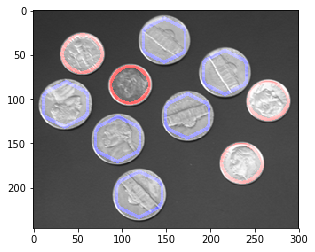

In [8]:
coins = cv2.imread('image2_folder/coins.png',0)
backtorgb = cv2.cvtColor(coins,cv2.COLOR_GRAY2RGB)
# Convert original image to binary
_,thresh = cv2.threshold(coins,90,255,cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
# Dilation and erosion to remove noises
dilation_original = cv2.dilate(thresh, kernel, iterations=1)
erosion_original = cv2.erode(dilation_original, kernel, iterations=2)

# To get the large circles only
kernel_disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
ero_large = cv2.erode(erosion_original, kernel_disk, iterations=11)
dil_larger = cv2.dilate(ero_large, kernel_disk, iterations=11)
large_image = dil_larger.copy()
erode_large_image = cv2.erode(large_image, kernel, iterations=3)

ones = np.ones([246,300,3],'uint8')
color = ones.copy()
color[:,:] = (0,0,255)
image = cv2.bitwise_and(color,color,mask=large_image-erode_large_image)
#cv2.imshow("1",image)


# To get the small circles
small_circles = erosion_original - dil_larger
ero_small = cv2.erode(small_circles, kernel, iterations=2)
dil_small = cv2.dilate(ero_small, kernel, iterations=2)
small_image = dil_small.copy()
erode_small_image = cv2.erode(small_image, kernel, iterations=3)
color2 = ones.copy()
color2[:,:] = (255,0,0)
image2 = cv2.bitwise_and(color2,color2,mask=small_image-erode_small_image)
#cv2.imshow('2',image2)

semi_final = cv2.add(image,image2)
#cv2.imshow('final',semi_final)

mask_inv = cv2.bitwise_not(small_image-erode_small_image+large_image-erode_large_image)
bg = cv2.bitwise_and(backtorgb,backtorgb,mask_inv)

final = cv2.add(semi_final,bg)
#cv2.imshow('final',final)
plt.imshow(final, cmap='gray')
#cv2.imshow("Coins",coins)
#cv2.imshow('Large Coins', dil_larger)
#cv2.imshow('Small coins', dil_small)

# For calculating the money
contours,hierachy=cv2.findContours(dil_small,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
small_coins = 25*len(contours)
contours,hierachy=cv2.findContours(dil_larger,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
large_coins = 50*len(contours)
print("Total is "+ str(small_coins+large_coins))


cv2.waitKey()
cv2.destroyAllWindows()